#### Với mức ý nghĩa 10%
1. Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)<br>
2. Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%<br>
#### Với mức ý nghĩa 5% 
3. Giữa độ tuổi (age) và thu nhập trung bình theo tháng (MonthlyIncome) có tương quan với nhau hay không?<br>
4. Giữa số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) và độ tuổi có tương quan với nhau không<br>
5. Giữa (số lượng người phụ thuộc) NumberOfDependents và thu nhập theo tháng (MonthlyIncome) có tương quan với nhau hay không<br>
6. Mã hóa lại thuộc tính MonthlyIncome thành thuộc tính MonthlyIncome_order theo các khoảng tứ phân vị, giữa thuộc tính mới này và tình trạng nợ xấu trong 2 năm trở lại đây (SeriousDlqin2yrs) có liên quan tới nhau không
Giữa thuộc tính MonthlyIncome_order với thuộc tính tỉ lệ số dư tài khoản (RevolvingUtilizationOfUnsecuredLines) có mối liên hệ với nhau không

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [156]:
data = pd.read_csv(r'C:\Users\HP\Data_Analysis_Python\Pandas_codegym\Tiền xử lý dữ liệu\Xử lý bộ dữ liệu Credit_scoring\Credit_Scoring.csv')
data.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149991,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [158]:
data.dropna(inplace=True)

In [159]:
data.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### 1. Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)

Với mức ý nghĩa 10%:<br>
    - H0: Những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình bằng những khách hàng có người phụ thuộc<br>
    - H1:  Những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình nhỏ hơn những khách hàng có người phụ thuộc

In [160]:
a = data[data['NumberOfDependents'] == 0]['MonthlyIncome']
b = data[data['NumberOfDependents'] != 0]['MonthlyIncome']
var_a = np.var(a)
var_b = np.var(b)
print(f'ration = {var_a/var_b if var_a>var_b else var_b/var_a}')

ration = 2.874512647868794


In [161]:
stats.ttest_ind(a,b, equal_var=True)

Ttest_indResult(statistic=-21.042068853166636, pvalue=4.066681887306811e-98)

pvalue<0.1 => Đủ điều kiện bác bỏ H0 <br>
statistic = -21.04 < -1.282 => Có thể kết luận những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình nhỏ hơn những khách hàng có người phụ thuộc

In [162]:
a.count()

65452

In [163]:
b.count()

54810

#### 2. Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%

Với mức ý nghĩa 10% <br>
- H0: trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) bằng những khách hàng không gặp khó khăn<br>
- H1: trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn

In [164]:
a = data[data['SeriousDlqin2yrs'] == 1]['NumberOfOpenCreditLinesAndLoans']
b = data[data['SeriousDlqin2yrs'] == 0]['NumberOfOpenCreditLinesAndLoans']
var_a = np.var(a)
var_b = np.var(b)
print(f'ration = {var_a/var_b if var_a>var_b else var_b/var_a}')

ration = 1.211274628720338


In [165]:
stats.ttest_ind(a,b, equal_var=True)

Ttest_indResult(statistic=-9.533971212477503, pvalue=1.540580742334634e-21)

statistic < 1.282 không thể bác bỏ H0 

#### 3. Giữa độ tuổi (age) và thu nhập trung bình theo tháng (MonthlyIncome) có tương quan với nhau hay không?

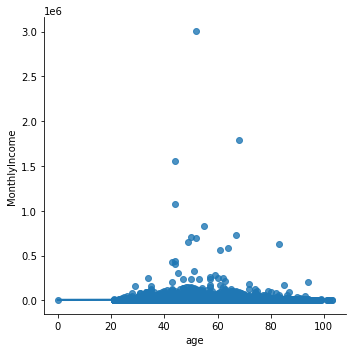

In [166]:
sns.lmplot(x='age', y='MonthlyIncome', data=data)
plt.show()

Với mức ý nghĩa 5%:<br>
    H0: Giữa tuổi và thu nhập không có mối tương quan<br>
    H1: Giữa tuổi và thu nhập có mối tương quan

In [167]:
stats.pearsonr(data['age'], data['MonthlyIncome'])

(0.03772151543470242, 3.964657234287844e-39)

pvalue<0.05, đủ điều kiện bác bỏ H0, có thể kết luận giữa tuổi và thu nhập có tương quan tuy nhiên tương quan là rất yếu

In [168]:
data['age_ordinal'] = pd.qcut(data['age'], 4, labels =[1,2,3,4])

In [169]:
data['age_ordinal'].unique()

[3, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [170]:
stats.spearmanr(data['age_ordinal'], data['MonthlyIncome'])

SpearmanrResult(correlation=0.12445739781331167, pvalue=0.0)

#### 4. Giữa số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) và độ tuổi có tương quan với nhau không<br>

In [171]:
stats.pearsonr(data['age'], data['NumberOfOpenCreditLinesAndLoans'])

(0.18711295715964155, 0.0)

p_value<0.05, bác bỏ H0, kết luận giữa biên tuổi và khoản vay có tương quan nhưng tương quan yếu

#### 5. Giữa (số lượng người phụ thuộc) NumberOfDependents và thu nhập theo tháng (MonthlyIncome) có tương quan với nhau hay không<br>

In [172]:
stats.pearsonr(data['NumberOfDependents'], data['MonthlyIncome'])

(0.0626714454917063, 6.211808987902723e-105)

pvalue < 0.05 kết luận giữa 2 biến có tương quan nhưng tương quan yếu

#### 6. Mã hóa lại thuộc tính MonthlyIncome thành thuộc tính MonthlyIncome_order theo các khoảng tứ phân vị, giữa thuộc tính mới này và tình trạng nợ xấu trong 2 năm trở lại đây (SeriousDlqin2yrs) có liên quan tới nhau không

In [180]:
data['MonthlyIncome_ordinal'] = pd.qcut(data['MonthlyIncome'], 4, labels =[1,2,3,4])

In [181]:
new_data = data.pivot_table(values='Unnamed: 0', index='MonthlyIncome_ordinal', columns='SeriousDlqin2yrs', aggfunc='count')

In [182]:
from scipy.stats import chi2_contingency

In [183]:
chi, p, dof, expected = chi2_contingency(new_data)
print('Chi-square value= ', chi)
print('pvalue= ', p)
print('degree of freedom= ', dof)
print('expected table= ', expected)

Chi-square value=  565.6248673547275
pvalue=  2.851613991246402e-122
degree of freedom=  3
expected table=  [[28181.67930019  2104.32069981]
 [27937.88348772  2086.11651228]
 [27817.84661822  2077.15338178]
 [27968.59059387  2088.40940613]]


pvalue<0.05, bác bỏ H0, 2 biến monthlyIncome và SeriousDlqin2yrs có tương quan với nhau